In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\singh\\Downloads\\german_credit_data.csv')

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
df.tail()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,999,27,male,2,own,moderate,moderate,4576,45,car,good


In [5]:
df.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [6]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [7]:
df.shape

(1000, 11)

In [9]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [10]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [11]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [12]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [13]:
df['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [14]:
df['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [15]:
df['Saving accounts'].fillna(value = 'mode', axis = 0, inplace = True)

In [16]:
df['Checking account'].fillna(value = 'mode', axis = 0, inplace = True)

In [17]:
df.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,mode,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,mode,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


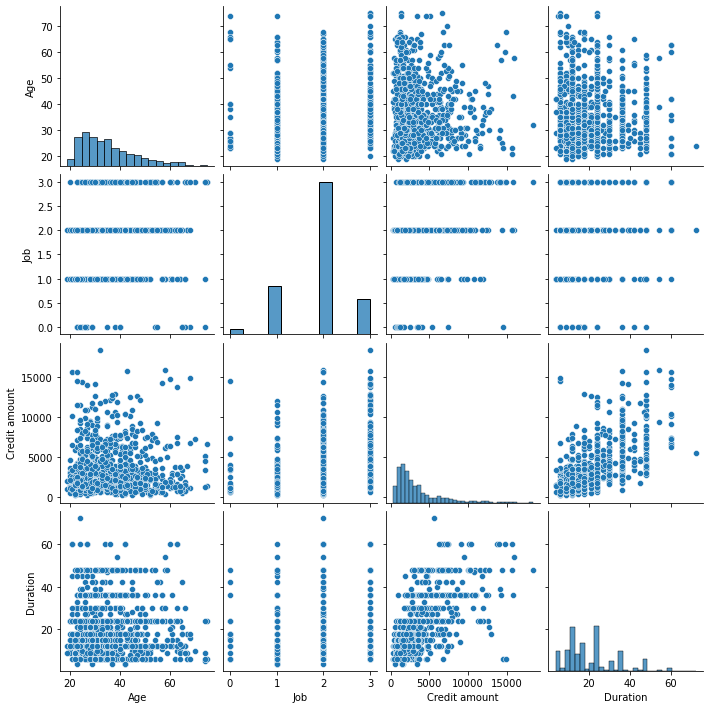

In [18]:
sns.pairplot(df)

In [19]:
duplicate_rows_df = df[df.duplicated()]
print('Number of duplicate rows:', duplicate_rows_df.shape)
# No duplicate data is present in the dataset


Number of duplicate rows: (0, 10)


In [20]:
num_atr=['Age' , 'Credit amount' , 'Duration']

cat_atr=['Sex' , 'Job' , 'Housing' , 'Saving accounts' , 'Checking account' , 'Purpose']

In [21]:
# Correlation Matrix
df.corr()

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


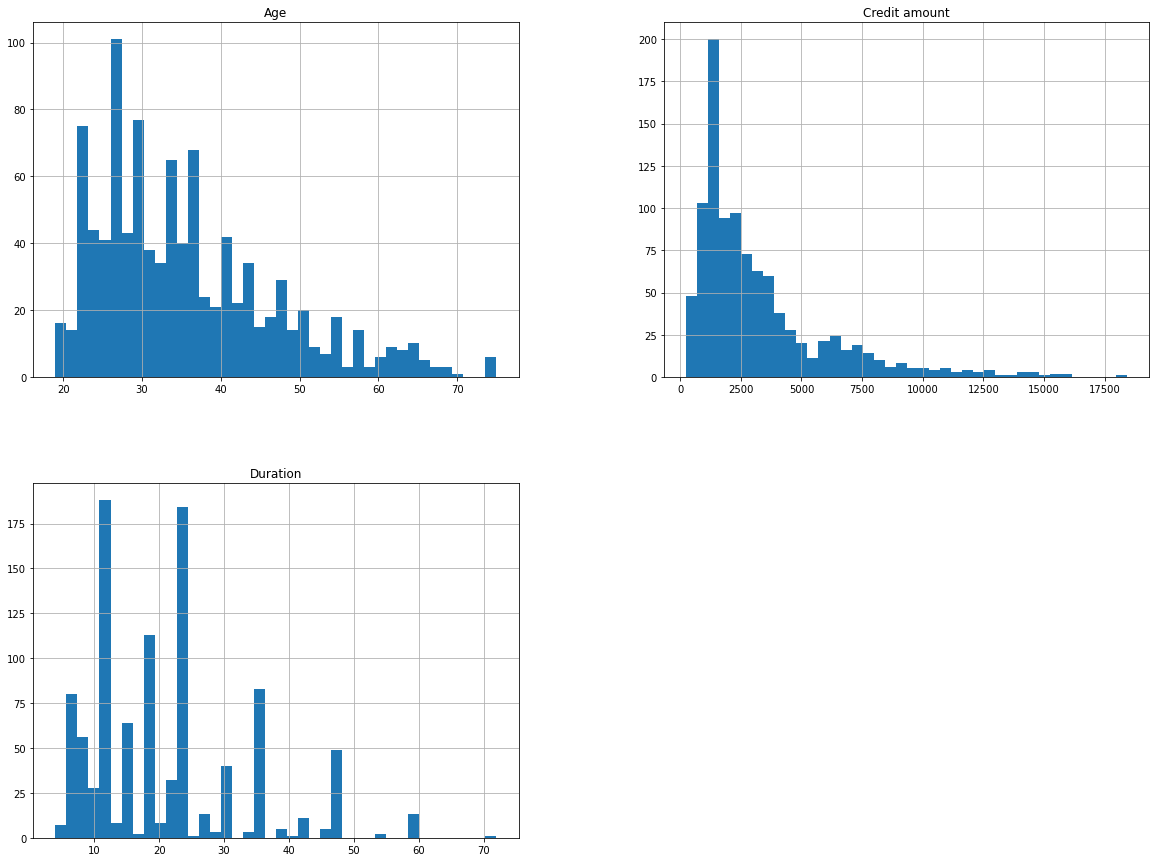

In [22]:
df[num_atr].hist(bins=40, figsize=(20,15)) 
plt.show()

In [23]:
# KNN Classification Algorithm

In [24]:
from sklearn.model_selection import train_test_split
X= df.drop(['Risk'], axis=1)
y= df['Risk']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import OneHotEncoder as onehot
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [27]:
X_train[cat_atr].head()

,Sex,Job,Housing,Saving accounts,Checking account,Purpose
731,1,1,2,0,0,5
716,1,2,1,1,1,5
640,0,0,1,0,0,3
804,0,0,2,1,2,1
737,1,1,1,2,0,1


In [28]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atr])

array([[-1.25959752, -0.44363756,  0.25913751],
       [ 0.3716242 , -0.05891106,  0.76208462],
       [-0.74447487, -0.88024919, -0.2438096 ],
       ...,
       [ 0.88674684,  0.12356931, -0.49528316],
       [-0.48691355, -0.50152301,  0.25913751],
       [ 0.11406287, -0.40375307, -0.2438096 ]])

In [29]:
a = X_train[cat_atr]
b = ss.transform(X_train[num_atr])

Xtr = np.hstack([a,b])
Xtr.shape 

(700, 9)

In [30]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean')

In [31]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atr])
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
a1 = X_test[cat_atr]
b1 = ss.transform(X_test[num_atr])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(300, 9)

In [32]:
y_pred = knn.predict(Xtr1)

In [33]:
confusion_matrix(y_test, y_pred)

array([[ 26,  60],
       [ 27, 187]], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test, y_pred)


0.71

In [36]:
from sklearn.metrics import precision_recall_fscore_support

In [37]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.49056604, 0.75708502]),
 array([0.30232558, 0.87383178]),
 array([0.37410072, 0.81127983]),
 array([ 86, 214], dtype=int64))

In [38]:
from sklearn.metrics import precision_score

In [42]:
precision_score(y_test, y_pred, pos_label = 'good')

0.757085020242915

In [43]:
from sklearn.metrics import recall_score

In [46]:
recall_score(y_test, y_pred, pos_label='good')


0.8738317757009346

In [47]:
from sklearn.metrics import f1_score

In [49]:
f1_score(y_test, y_pred, pos_label='good')

0.8112798264642084

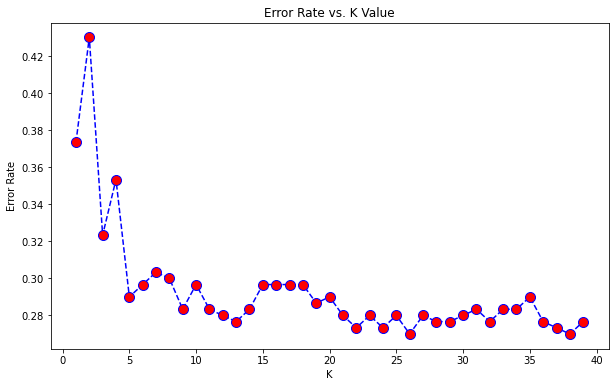

Minimum error:- 0.27 at K = 26


In [50]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(Xtr,y_train)
 pred_i = knn.predict(Xtr1)
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [51]:
knn = KNeighborsClassifier(n_neighbors=26, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=26)

In [52]:
knn = KNeighborsClassifier(n_neighbors=26, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=26)

In [53]:
y_pred = knn.predict(Xtr1)

In [55]:
accuracy_score(y_test, y_pred)

0.73